In [1]:
import pandas as pd
from statsbombpy import sb
from mplsoccer import Pitch
from mplsoccer import VerticalPitch, add_image, FontManager, Sbopen
from matplotlib import pyplot as plt

In [2]:
# Spain vs Poland
MATCH_ID = 3788762
TEAM = 'Poland'

parser = Sbopen()
event, related, freeze, tactics = parser.event(MATCH_ID)

# starting players from Barcelona
starting_xi_event = event.loc[((event['type_name'] == 'Starting XI') &
                               (event['team_name'] == TEAM)), ['id', 'tactics_formation']]
# joining on the team name and formation to the lineup
starting_xi = tactics.merge(starting_xi_event, on='id')
event = event.loc[((event['type_name'] == 'Ball Receipt') &
                   (event['outcome_name'].isnull()) &
                   (event['player_id'].isin(starting_xi['player_id']))
                   ), ['player_id', 'x', 'y']]
# merge on the starting positions to the events
event = event.merge(starting_xi, on='player_id')
formation = event['tactics_formation'].iloc[0]

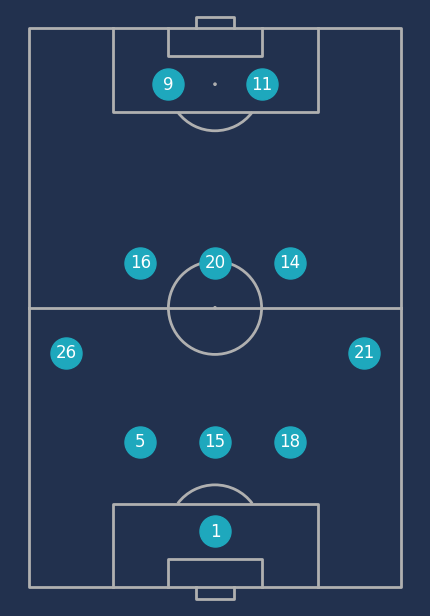

In [3]:
pitch = VerticalPitch(goal_type='box', pitch_color= '#22314E')
fig, ax = pitch.draw(figsize=(4.4, 6.4))
ax_text = pitch.formation(formation, 
                          positions=starting_xi.position_id, 
                          kind='text',
                          text=starting_xi.jersey_number,
                          va='center', 
                          ha='center', 
                          fontsize=12, 
                          ax=ax,
                          color = 'white')

fig.set_facecolor('#22314E')

ax_scatter = pitch.formation(formation, 
                             positions=starting_xi.position_id, 
                             kind='scatter',
                             c='#1EA8BD', 
                             #linewidth=3, 
                             s=500,
                             #xoffset=-8,
                             ax=ax)

